In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
account=pd.read_csv("account.csv")
district=pd.read_csv("district.csv")
loan=pd.read_csv("loan.csv")
disposition=pd.read_csv("disp.csv")
per_order=pd.read_csv("order.csv")
transaction=pd.read_csv("trans.csv",sep=';')
client=pd.read_csv("client.csv")
credit_card=pd.read_csv("card.csv")

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [4]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [5]:
account.shape

(4500, 4)

In [6]:
account.isna().sum()

account_id     0
district_id    0
frequency      0
date           0
dtype: int64

In [7]:
account.nunique()

account_id     4500
district_id      77
frequency         3
date           1535
dtype: int64

In [8]:
account['frequency'].describe()

count                 4500
unique                   3
top       POPLATEK MESICNE
freq                  4167
Name: frequency, dtype: object

In [9]:
account.describe()

,account_id,district_id,date
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,951654.608667
std,2313.811984,25.177217,14842.188377
min,1.000000,1.000000,930101.000000
25%,1182.750000,13.000000,931227.000000
50%,2368.000000,38.000000,960102.000000
75%,3552.250000,60.000000,961101.000000
max,11382.000000,77.000000,971229.000000


In [10]:
type(account['frequency'][0])

str

In [11]:
for x in account.dtypes.index:
    account.rename(columns = {x : x.lower()}, inplace = True)
for x in account.dtypes[account.dtypes == "object"].index:
    account[x]=account[x].str.lower()

In [12]:
account["frequency"].replace({"poplatek mesicne": "mi", "poplatek po obratu": "ti","poplatek tydne":"wi"}, inplace=True)


In [13]:
account.rename({'date' : 'account_date'}, axis=1,inplace=True)

In [14]:
account.head()

,account_id,district_id,frequency,account_date
0,576,55,mi,930101
1,3818,74,mi,930101
2,704,55,mi,930101
3,2378,16,mi,930101
4,2632,24,mi,930102


array([[<AxesSubplot:title={'center':'account_id'}>,
        <AxesSubplot:title={'center':'district_id'}>],
       [<AxesSubplot:title={'center':'account_date'}>, <AxesSubplot:>]],
      dtype=object)

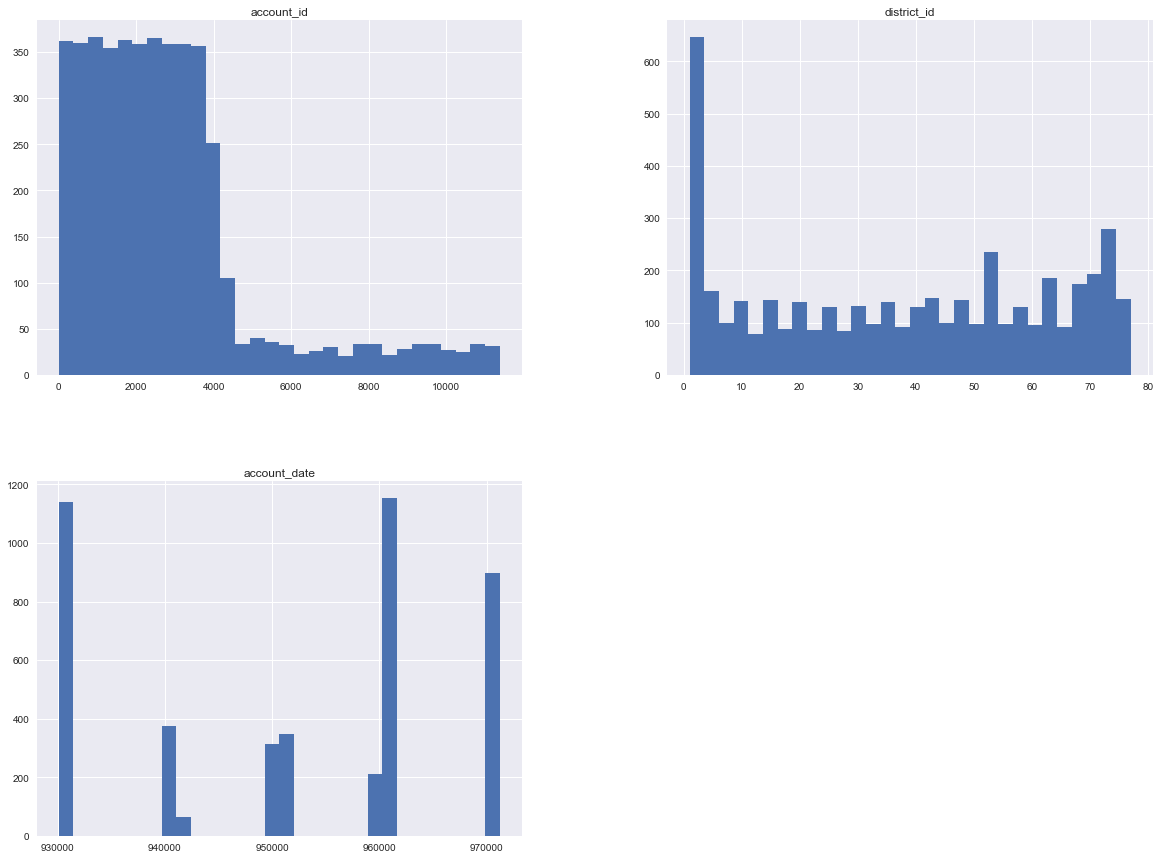

In [15]:
%matplotlib inline

plt.style.use('seaborn')
account.hist(bins=30, figsize=(20,15)) # plotting the histogram

In [16]:
account['account_id'].max()

11382

In [17]:
account['account_id'].describe()

count     4500.000000
mean      2786.067556
std       2313.811984
min          1.000000
25%       1182.750000
50%       2368.000000
75%       3552.250000
max      11382.000000
Name: account_id, dtype: float64

In [18]:
account['district_id'].describe()

count    4500.000000
mean       37.310444
std        25.177217
min         1.000000
25%        13.000000
50%        38.000000
75%        60.000000
max        77.000000
Name: district_id, dtype: float64

In [19]:
account['district_id'].nunique()
    

77

In [20]:
account['frequency'].nunique()


3

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


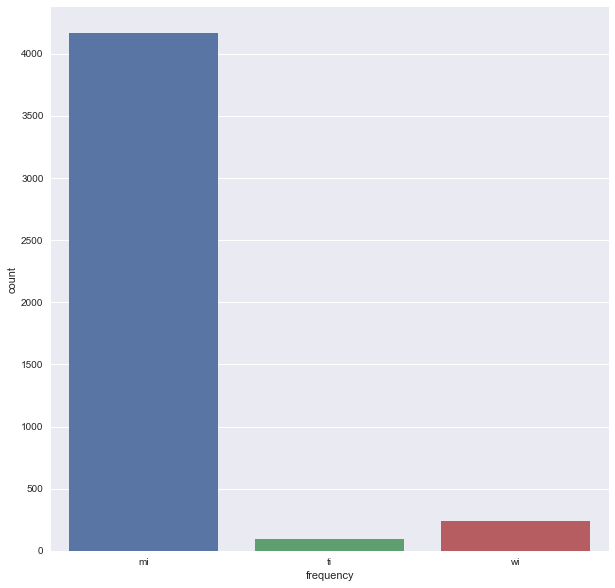

In [21]:
sns.countplot(account['frequency'])
fig = plt.gcf()
fig.set_size_inches(10,10)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


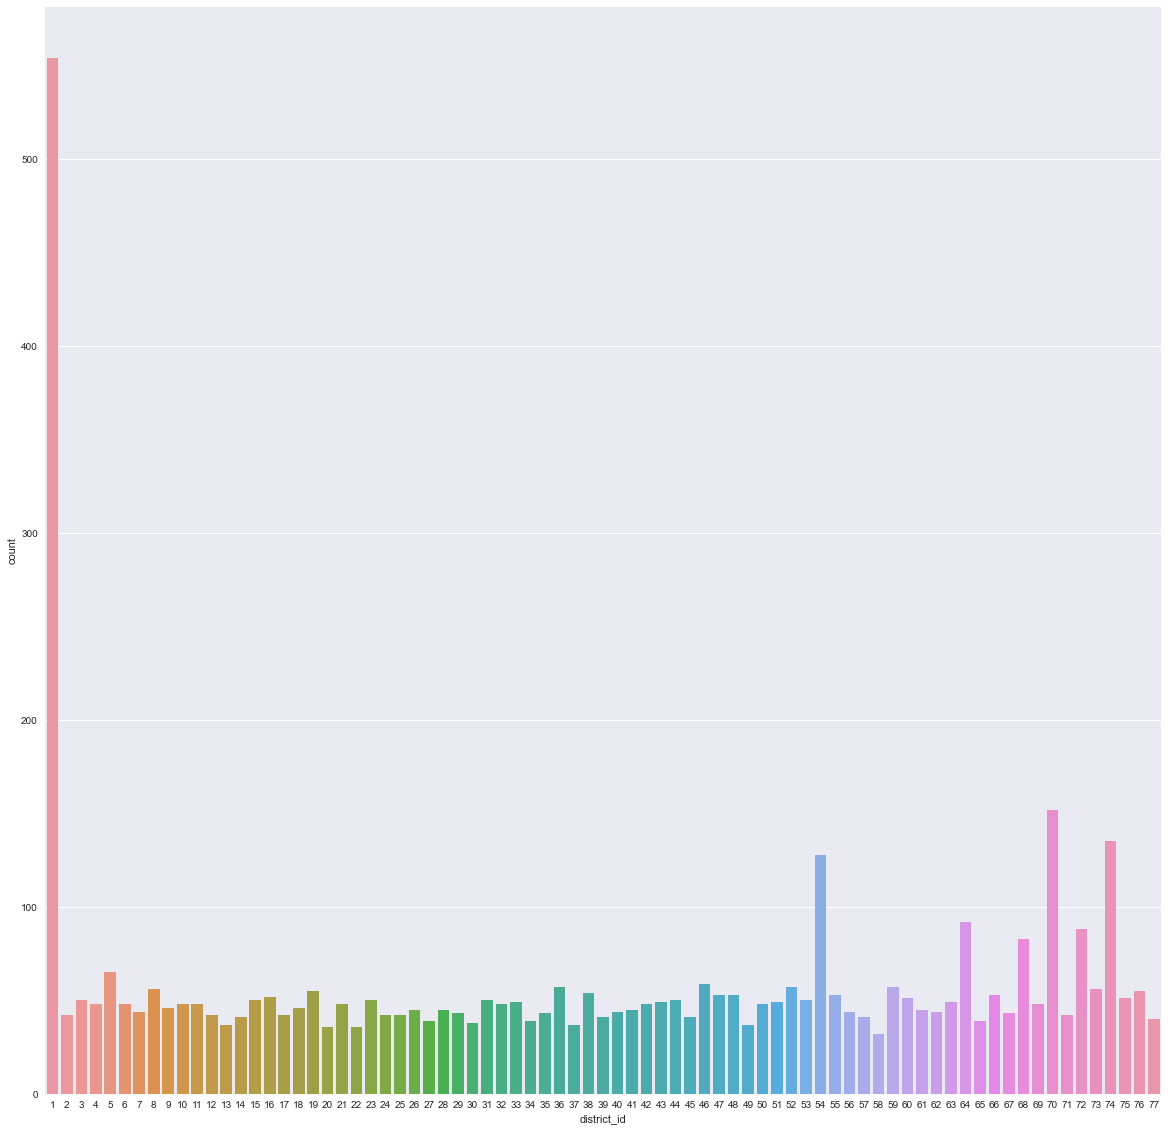

In [22]:
sns.countplot(account['district_id'])
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.savefig("district_id_FREQUENCY.png")

In [23]:
account['account_date'].nunique()

1535

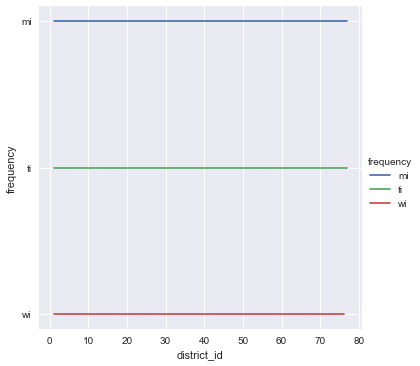

In [24]:

sns.relplot(
    data=account, kind="line",
    x="district_id", y="frequency",
    hue="frequency",
    facet_kws=dict(sharex=False),
)

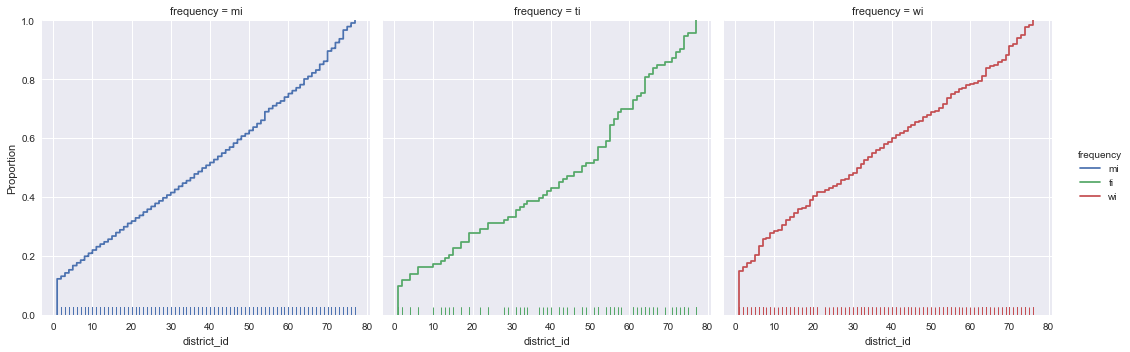

In [25]:
sns.displot(account, kind="ecdf", x="district_id", col="frequency", hue="frequency", rug=True)


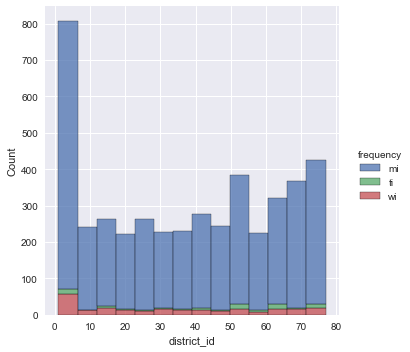

In [26]:
sns.displot(account, x="district_id", hue="frequency", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("account_frequency vs district_id.png")

In [27]:
sns.__version__

'0.11.1'

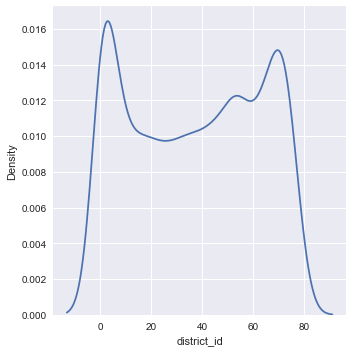

In [28]:
sns.displot(account, x="district_id", kind="kde")


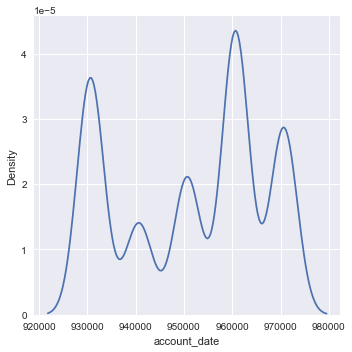

In [29]:
sns.displot(account, x="account_date", kind="kde")


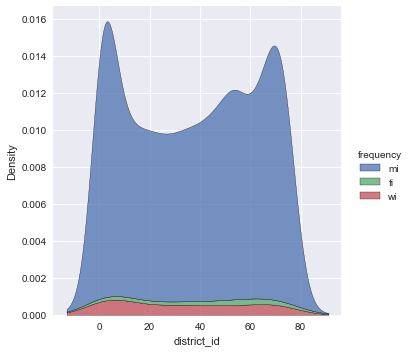

In [30]:
sns.displot(account, x="district_id", hue="frequency", kind="kde",multiple="stack")


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


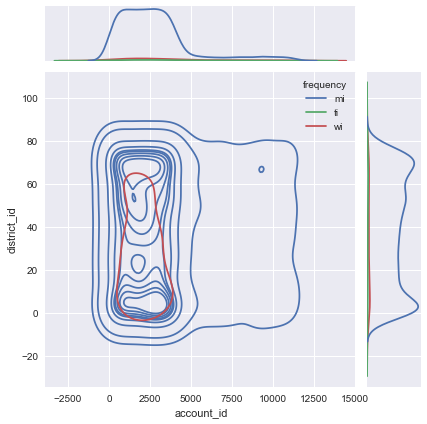

In [31]:
sns.jointplot(data=account, x="account_id", y="district_id",kind="kde",hue="frequency")
plt.savefig("account_id,district_id,frequency.png")

Index(['account_id', 'district_id', 'frequency', 'account_date'], dtype='object')

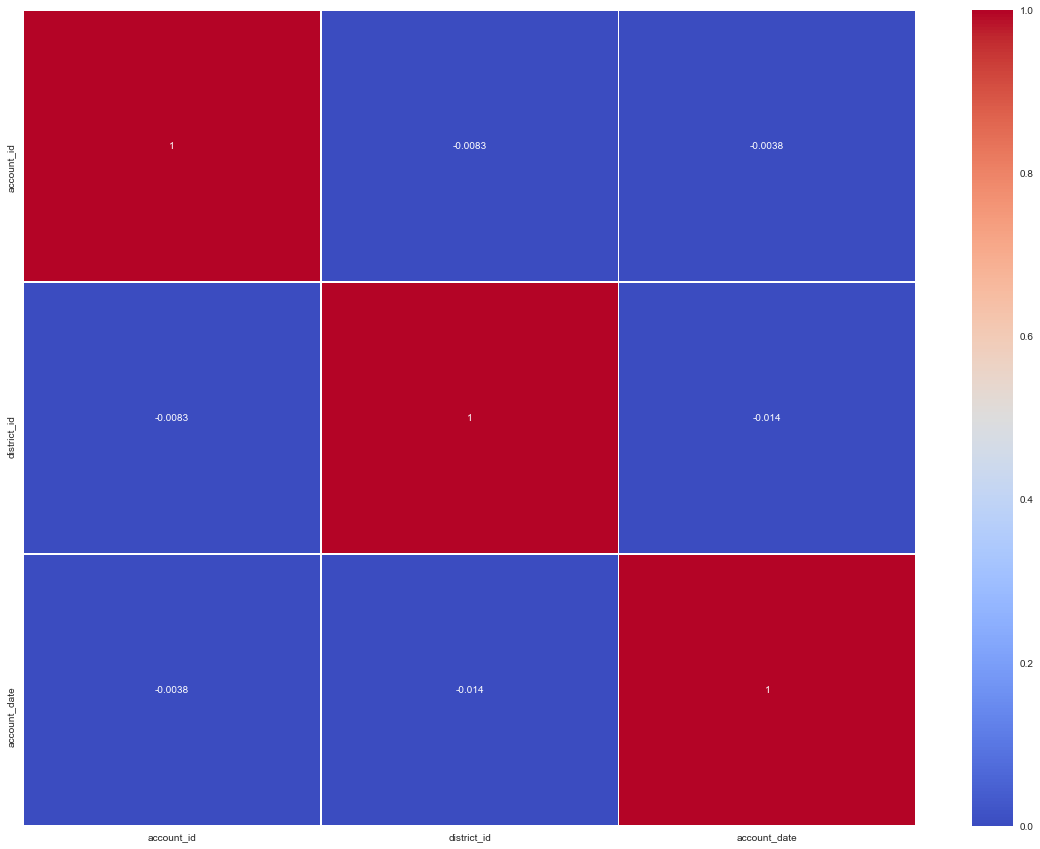

In [32]:
#Get Correlation between different variables
corr = account.corr(method='kendall')
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True,linewidths=.5,cmap= 'coolwarm', vmin=0, vmax=1)
account.columns
# sns_plot.savefig("output.png")
# plt.savefig("HEAT_MAP1.png")

In [33]:
account.isna().sum()

account_id      0
district_id     0
frequency       0
account_date    0
dtype: int64

In [34]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A
2,6863,9188,930728,127080,60,2118,A
3,5325,1843,930803,105804,36,2939,A
4,7240,11013,930906,274740,60,4579,A


In [35]:
loan.describe()

,loan_id,account_id,date,amount,duration,payments
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,963027.910557,151410.175953,36.492669,4190.664223
std,682.579279,3283.512681,14616.406049,113372.406310,17.075219,2215.830344
min,4959.000000,2.000000,930705.000000,4980.000000,12.000000,304.000000
25%,5577.500000,2967.000000,950704.500000,66732.000000,24.000000,2477.000000
50%,6176.500000,5738.500000,970206.500000,116928.000000,36.000000,3934.000000
75%,6752.500000,8686.000000,971212.500000,210654.000000,48.000000,5813.500000
max,7308.000000,11362.000000,981208.000000,590820.000000,60.000000,9910.000000


In [36]:
loan.rename({'date' : 'loan_date','amount':'loan_amount'}, axis=1,inplace=True)


In [37]:
loan.head()

,loan_id,account_id,loan_date,loan_amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A
2,6863,9188,930728,127080,60,2118,A
3,5325,1843,930803,105804,36,2939,A
4,7240,11013,930906,274740,60,4579,A


In [38]:
loan.nunique()

loan_id        682
account_id     682
loan_date      559
loan_amount    645
duration         5
payments       577
status           4
dtype: int64

In [39]:
loan.shape

(682, 7)

In [40]:
for x in loan.dtypes.index:
    loan.rename(columns = {x : x.lower()}, inplace = True)
for x in loan.dtypes[loan.dtypes == "object"].index:
    loan[x]=loan[x].str.lower()

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


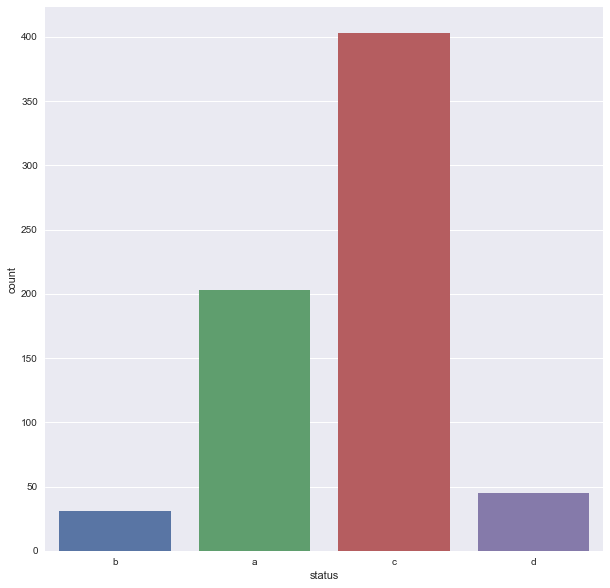

In [41]:
sns.countplot(loan['status'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("loan_status.png")

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


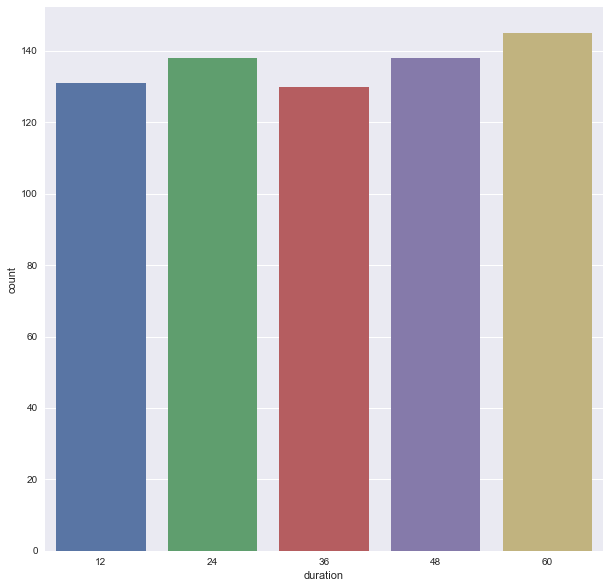

In [42]:
sns.countplot(loan['duration'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("loan_duration.png")

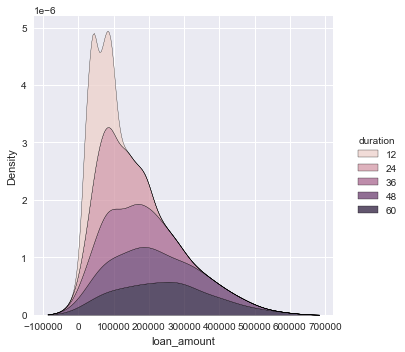

In [43]:
sns.displot(loan, x="loan_amount", hue="duration", kind="kde",multiple="stack")

plt.savefig("loan_amountHUEduration.png")

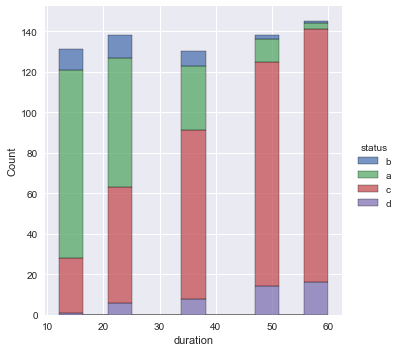

In [44]:
sns.displot(loan, x="duration", hue="status", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("durationVSstatus.png")

In [45]:
credit_card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [46]:
for x in credit_card.dtypes.index:
    credit_card.rename(columns = {x : x.lower()}, inplace = True)
for x in credit_card.dtypes[credit_card.dtypes == "object"].index:
    credit_card[x]=credit_card[x].str.lower()

In [47]:
credit_card.rename({'issued' : 'card_issued','birth_number':'birth_date'}, axis=1,inplace=True)

In [48]:
credit_card['card_issued'] = credit_card['card_issued'].apply(lambda x: pd.Timestamp(x).strftime('%Y%m%d'))

In [49]:
credit_card.head()

,card_id,disp_id,type,card_issued
0,1005,9285,classic,19931107
1,104,588,classic,19940119
2,747,4915,classic,19940205
3,70,439,classic,19940208
4,577,3687,classic,19940215


In [50]:
credit_card['card_issued']=credit_card['card_issued'].map(lambda x:x[2:])

In [51]:
credit_card.head()

,card_id,disp_id,type,card_issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


In [52]:
credit_card.rename({'type':'card_type'}, axis=1,inplace=True)

In [53]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   card_id      892 non-null    int64 
 1   disp_id      892 non-null    int64 
 2   card_type    892 non-null    object
 3   card_issued  892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [54]:
credit_card.shape

(892, 4)

In [55]:
credit_card.describe()

,card_id,disp_id
count,892.000000,892.000000
mean,480.855381,3511.862108
std,306.933982,2984.373626
min,1.000000,9.000000
25%,229.750000,1387.000000
50%,456.500000,2938.500000
75%,684.250000,4459.500000
max,1247.000000,13660.000000


In [56]:
credit_card.isnull().sum()

card_id        0
disp_id        0
card_type      0
card_issued    0
dtype: int64

In [57]:
credit_card.nunique()

card_id        892
disp_id        892
card_type        3
card_issued    607
dtype: int64

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


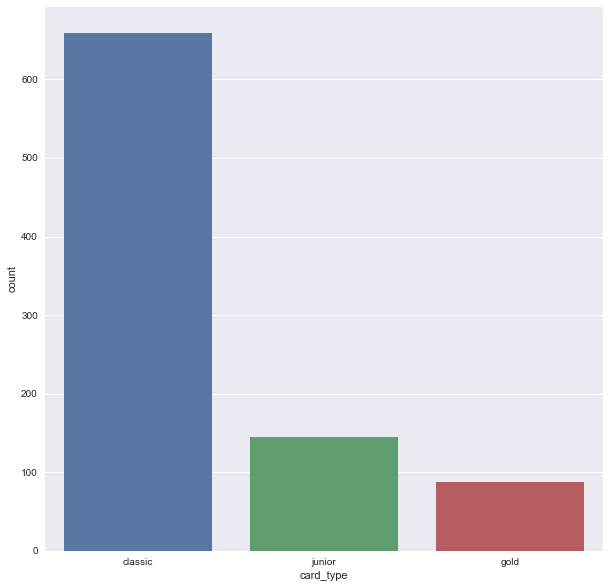

In [58]:
sns.countplot(credit_card['card_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("card_type.png")

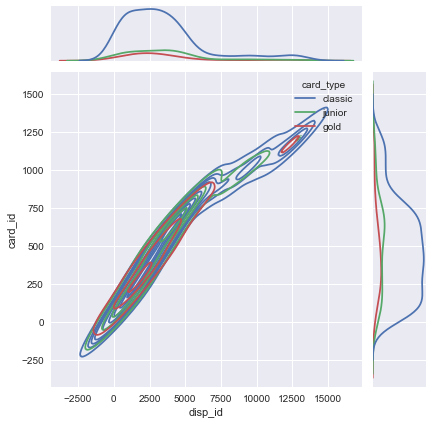

In [59]:
sns.jointplot(data=credit_card, x="disp_id", y="card_id",kind="kde",hue="card_type")
plt.savefig("card_id,disp_id,card_type.png")

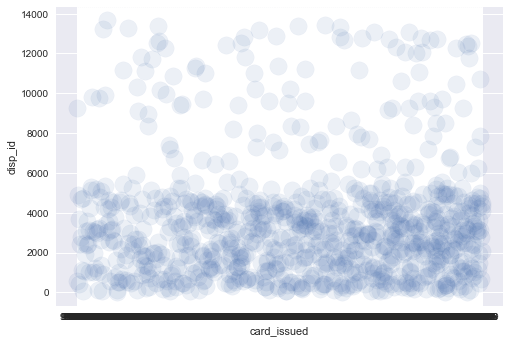

In [60]:
credit_card.plot(kind='scatter', x='card_issued', y='disp_id', alpha=0.1, s=300)
plt.savefig("disp_idvscard_issued.png")

In [61]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [62]:
for x in client.dtypes.index:
    client.rename(columns = {x : x.lower()}, inplace = True)
for x in client.dtypes[client.dtypes == "object"].index:
    client[x]=client[x].str.lower()

In [63]:
client["gender"]=client['birth_number'].map(lambda x: 'f' if x%10000> 3100 else 'm')

In [64]:
client["birth_number"]=client['birth_number'].map(lambda x: x-5000 if x%10000> 3100 else x)

In [65]:
client.rename({'birth_date':'client_birth_date'}, axis=1,inplace=True)

In [66]:
client.head()

,client_id,birth_number,district_id,gender
0,1,701213,18,f
1,2,450204,1,m
2,3,401009,1,f
3,4,561201,5,m
4,5,600703,5,f


In [67]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     5369 non-null   int64 
 1   birth_number  5369 non-null   int64 
 2   district_id   5369 non-null   int64 
 3   gender        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [68]:
client.describe()

,client_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,532651.755262,37.310114
std,2832.911984,172819.917889,25.043690
min,1.000000,110820.000000,1.000000
25%,1418.000000,401125.000000,14.000000
50%,2839.000000,540506.000000,38.000000
75%,4257.000000,680609.000000,60.000000
max,13998.000000,870927.000000,77.000000


In [69]:
client.isna().sum()

client_id       0
birth_number    0
district_id     0
gender          0
dtype: int64

In [70]:
client.nunique()

client_id       5369
birth_number    4738
district_id       77
gender             2
dtype: int64

In [71]:
client.shape

(5369, 4)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


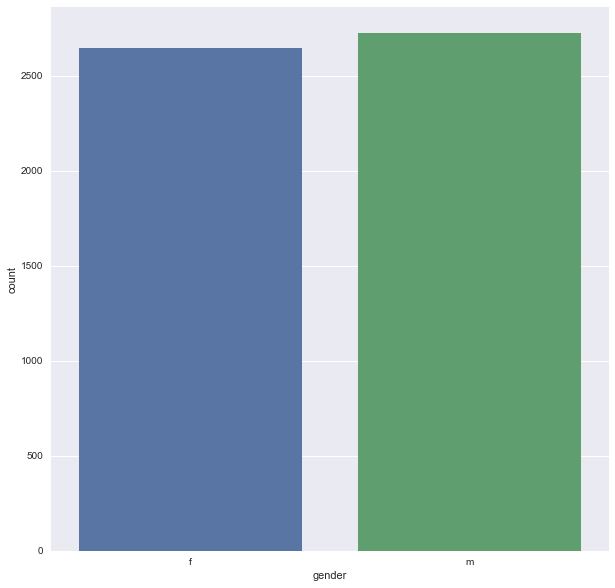

In [72]:
sns.countplot(client['gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("gender_inclient.png")

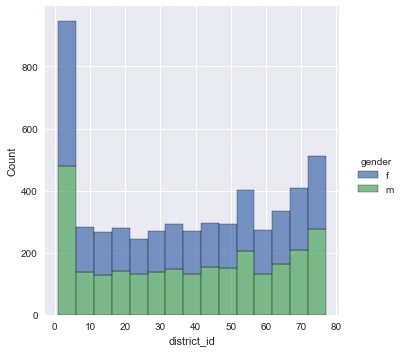

In [73]:
sns.displot(client, x="district_id", hue="gender", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("district_id vs gender.png")

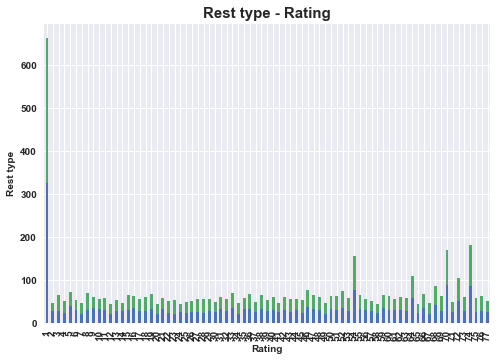

In [74]:
loc_plt=pd.crosstab(client['district_id'],client['gender'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [75]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [76]:
district.rename(columns = {'A1' : 'district_id','A2' : 'District_Name','A3':'Region','A4':'No_of_Inhabitants','A5':'Municipalities_inhabitants<499','A6':'Municipalities_inhabitants_500-1999','A7':'Municipalities_inhabitants_2000-9999','A8':'Municipalities_inhabitants>10000', 'A9':'No_of_Cities', 'A10':'Ratio_urban_inhabitants', 'A11':'Average_Salary', 'A12':'Unemployment_rate_1995', 'A13':'Unemployment_rate_1996', 'A14':'Enterpreneurs_per_1000_inhabitants', 'A15':'Crimes_commited_in_1995',
       'A16':'Crimes_commited_in_1996'}, inplace = True)

In [77]:
for x in district.dtypes.index:
    district.rename(columns = {x : x.lower()}, inplace = True)
for x in district.dtypes[district.dtypes == "object"].index:
    district[x]=district[x].str.lower()

In [78]:
district.head()

,district_id,district_name,region,no_of_inhabitants,municipalities_inhabitants<499,municipalities_inhabitants_500-1999,municipalities_inhabitants_2000-9999,municipalities_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,average_salary,unemployment_rate_1995,unemployment_rate_1996,enterpreneurs_per_1000_inhabitants,crimes_commited_in_1995,crimes_commited_in_1996
0,1,hl.m. praha,prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,benesov,central bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,beroun,central bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,kladno,central bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,kolin,central bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


array([[<AxesSubplot:title={'center':'district_id'}>,
        <AxesSubplot:title={'center':'no_of_inhabitants'}>,
        <AxesSubplot:title={'center':'municipalities_inhabitants<499'}>],
       [<AxesSubplot:title={'center':'municipalities_inhabitants_500-1999'}>,
        <AxesSubplot:title={'center':'municipalities_inhabitants_2000-9999'}>,
        <AxesSubplot:title={'center':'municipalities_inhabitants>10000'}>],
       [<AxesSubplot:title={'center':'no_of_cities'}>,
        <AxesSubplot:title={'center':'ratio_urban_inhabitants'}>,
        <AxesSubplot:title={'center':'average_salary'}>],
       [<AxesSubplot:title={'center':'unemployment_rate_1996'}>,
        <AxesSubplot:title={'center':'enterpreneurs_per_1000_inhabitants'}>,
        <AxesSubplot:title={'center':'crimes_commited_in_1996'}>]],
      dtype=object)

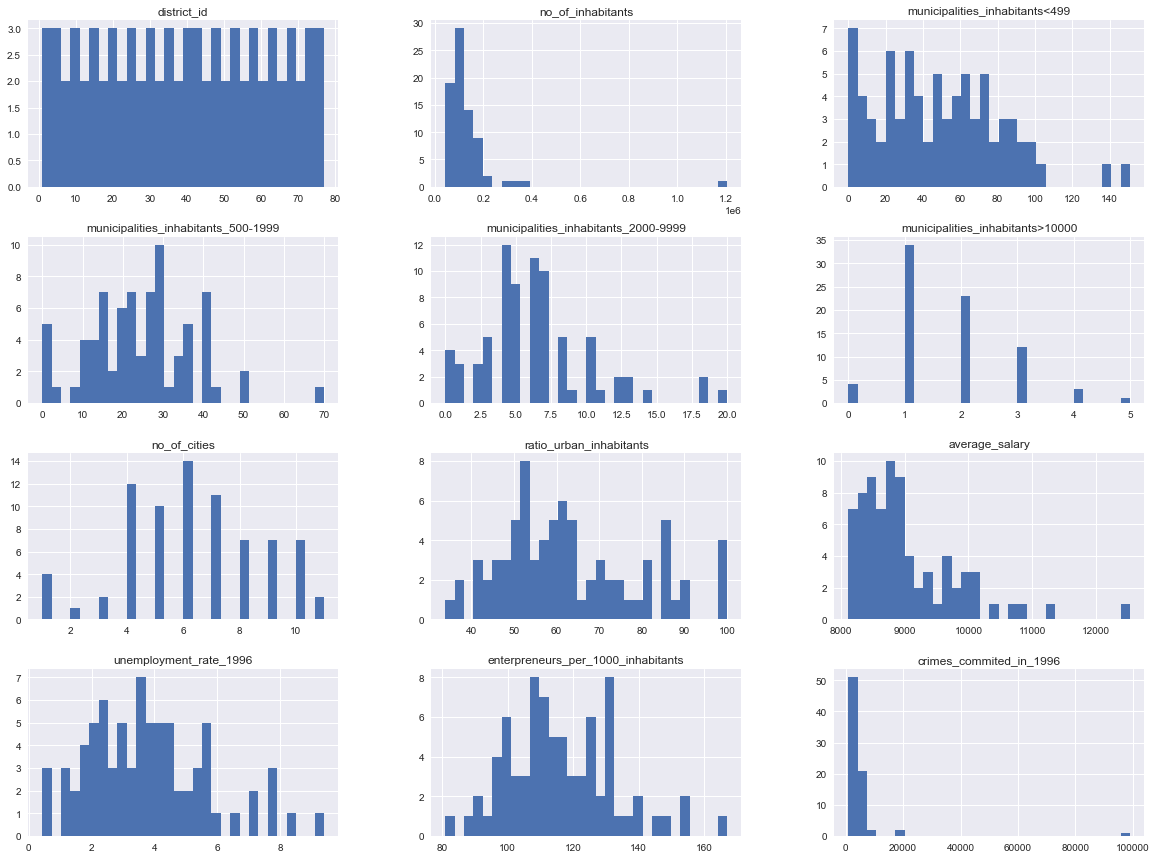

In [79]:
%matplotlib inline

plt.style.use('seaborn')
district.hist(bins=30, figsize=(20,15)) # plotting the histogram

In [80]:
district.describe()

,district_id,no_of_inhabitants,municipalities_inhabitants<499,municipalities_inhabitants_500-1999,municipalities_inhabitants_2000-9999,municipalities_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,average_salary,unemployment_rate_1996,enterpreneurs_per_1000_inhabitants,crimes_commited_in_1996
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,3.787013,116.129870,5030.831169
std,22.371857,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,1.908480,16.608773,11270.796786
min,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,20.000000,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,2.310000,105.000000,2122.000000
50%,39.000000,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,3.600000,113.000000,3040.000000
75%,58.000000,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,4.790000,126.000000,4595.000000
max,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


In [82]:
district.nunique()

district_id                             77
district_name                           77
region                                   8
no_of_inhabitants                       77
municipalities_inhabitants<499          53
municipalities_inhabitants_500-1999     36
municipalities_inhabitants_2000-9999    17
municipalities_inhabitants>10000         6
no_of_cities                            11
ratio_urban_inhabitants                 70
average_salary                          76
unemployment_rate_1995                  71
unemployment_rate_1996                  73
enterpreneurs_per_1000_inhabitants      44
crimes_commited_in_1995                 76
crimes_commited_in_1996                 76
dtype: int64

In [83]:
district.shape

(77, 16)

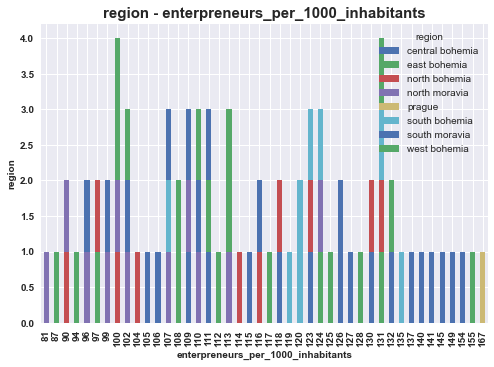

In [92]:
type_plt=pd.crosstab(district['enterpreneurs_per_1000_inhabitants'],district['region'])
type_plt.plot(kind='bar',stacked=True);

plt.title('region - enterpreneurs_per_1000_inhabitants',fontsize=15,fontweight='bold')
plt.ylabel('region',fontsize=10,fontweight='bold')
plt.xlabel('enterpreneurs_per_1000_inhabitants',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
fig.set_size_inches(18.5, 10.5, forward=True)
plt.savefig("enterpreneurs_per_1000_inhabitants vs region.png")

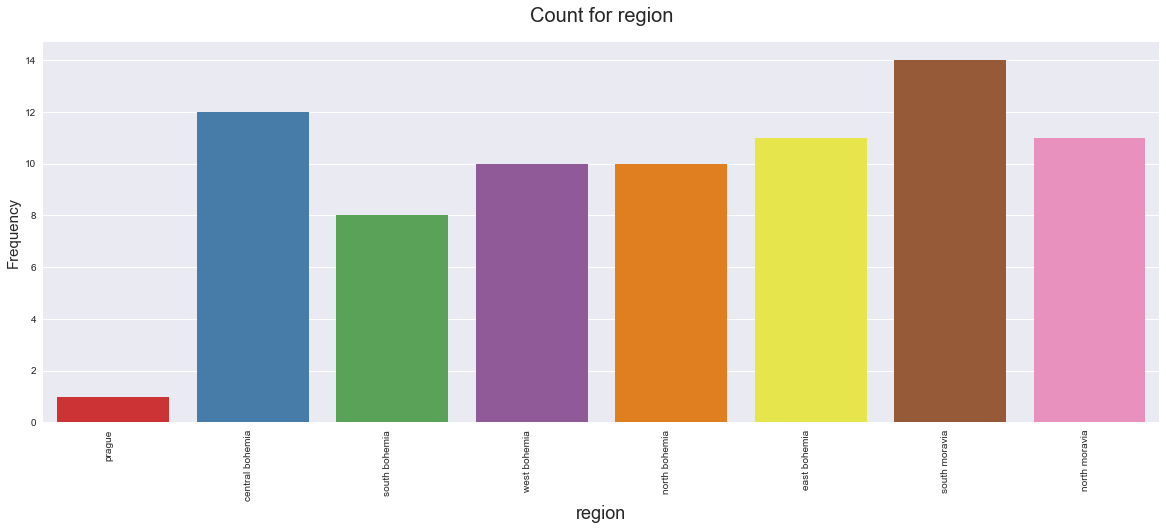

In [96]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="region",data=district, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("region",size=18)
loc
plt.title('Count for region',size = 20,pad=20)
plt.savefig("count_region.png")

<AxesSubplot:xlabel='district_id', ylabel='municipalities_inhabitants_500-1999'>

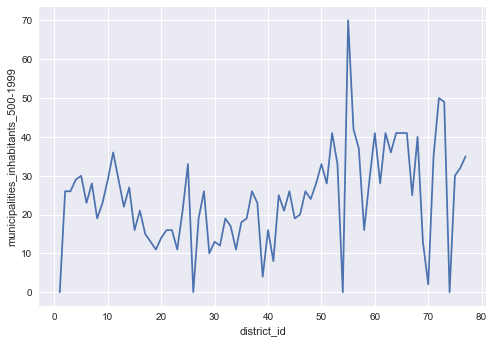

In [97]:
sns.lineplot(data=district, x="district_id", y="municipalities_inhabitants_500-1999",)

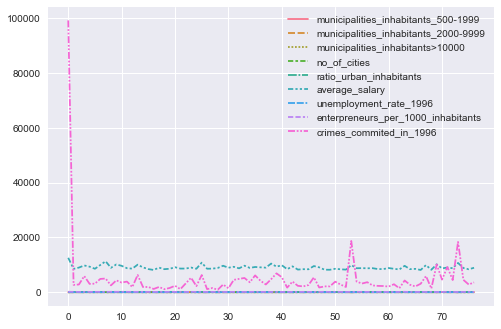

In [121]:
sns.lineplot(data=yut)
plt.savefig("district_line.png")


In [117]:
yut=district.iloc[:, 5:]

In [118]:
district.columns

Index(['district_id', 'district_name', 'region', 'no_of_inhabitants',
       'municipalities_inhabitants<499', 'municipalities_inhabitants_500-1999',
       'municipalities_inhabitants_2000-9999',
       'municipalities_inhabitants>10000', 'no_of_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_1995',
       'unemployment_rate_1996', 'enterpreneurs_per_1000_inhabitants',
       'crimes_commited_in_1995', 'crimes_commited_in_1996'],
      dtype='object')

In [119]:
yut.columns

Index(['municipalities_inhabitants_500-1999',
       'municipalities_inhabitants_2000-9999',
       'municipalities_inhabitants>10000', 'no_of_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemployment_rate_1995',
       'unemployment_rate_1996', 'enterpreneurs_per_1000_inhabitants',
       'crimes_commited_in_1995', 'crimes_commited_in_1996'],
      dtype='object')

In [122]:
disposition.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [123]:
for x in disposition.dtypes.index:
    disposition.rename(columns = {x : x.lower()}, inplace = True)
for x in disposition.dtypes[disposition.dtypes == "object"].index:
    disposition[x]=disposition[x].str.lower()

In [124]:
disposition.rename({'type':'disposition_type'}, axis=1,inplace=True)

In [125]:
disposition.head()

,disp_id,client_id,account_id,disposition_type
0,1,1,1,owner
1,2,2,2,owner
2,3,3,2,disponent
3,4,4,3,owner
4,5,5,3,disponent


In [126]:
disposition.nunique()

disp_id             5369
client_id           5369
account_id          4500
disposition_type       2
dtype: int64

In [127]:
disposition.shape

(5369, 4)

In [128]:
disposition.describe()

,disp_id,client_id,account_id
count,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927
std,2770.418826,2832.911984,2307.843630
min,1.000000,1.000000,1.000000
25%,1418.000000,1418.000000,1178.000000
50%,2839.000000,2839.000000,2349.000000
75%,4257.000000,4257.000000,3526.000000
max,13690.000000,13998.000000,11382.000000


In [129]:
dis_cli=pd.merge(disposition,client,left_on='client_id',right_on='client_id')

In [130]:
dis_cli.head()

,disp_id,client_id,account_id,disposition_type,birth_number,district_id,gender
0,1,1,1,owner,701213,18,f
1,2,2,2,owner,450204,1,m
2,3,3,2,disponent,401009,1,f
3,4,4,3,owner,561201,5,m
4,5,5,3,disponent,600703,5,f


In [131]:
dis_cli.describe()

,disp_id,client_id,account_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927,532651.755262,37.310114
std,2770.418826,2832.911984,2307.843630,172819.917889,25.043690
min,1.000000,1.000000,1.000000,110820.000000,1.000000
25%,1418.000000,1418.000000,1178.000000,401125.000000,14.000000
50%,2839.000000,2839.000000,2349.000000,540506.000000,38.000000
75%,4257.000000,4257.000000,3526.000000,680609.000000,60.000000
max,13690.000000,13998.000000,11382.000000,870927.000000,77.000000


In [132]:
dis_cli.nunique()

disp_id             5369
client_id           5369
account_id          4500
disposition_type       2
birth_number        4738
district_id           77
gender                 2
dtype: int64

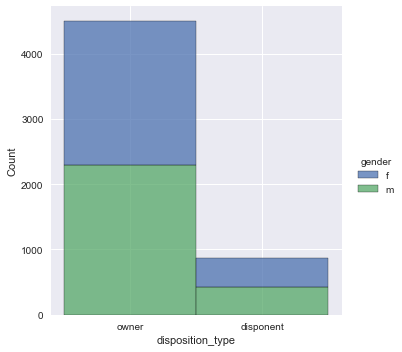

In [134]:
sns.displot(dis_cli, x="disposition_type", hue="gender", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("dis_cli.png")

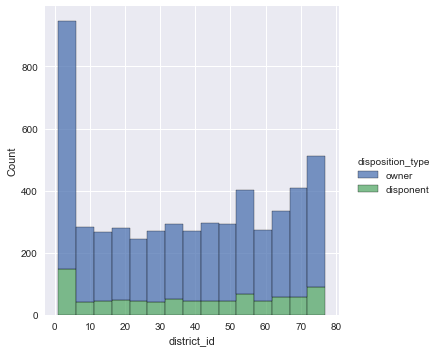

In [137]:
sns.displot(dis_cli, x="district_id", hue="disposition_type", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("dis_cli2.png")

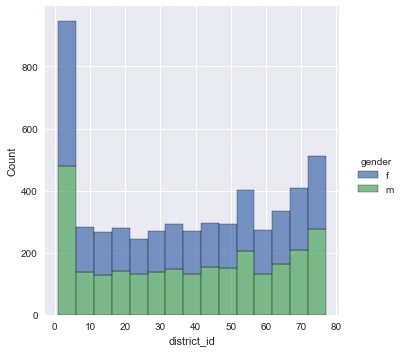

In [138]:
sns.displot(dis_cli, x="district_id", hue="gender", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("dis_cli3.png")

In [139]:
per_order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [140]:
for x in per_order.dtypes.index:
    per_order.rename(columns = {x : x.lower()}, inplace = True)
for x in per_order.dtypes[per_order.dtypes == "object"].index:
    per_order[x]=per_order[x].str.lower()

In [141]:
per_order["k_symbol"].replace({" ":"ps"}, inplace=True)


In [142]:
per_order['k_symbol'].replace('','s',inplace=True) 

In [143]:
per_order["k_symbol"].replace({"pojistne": "ip","sipo":"h","leasing":"op","uver":"lp"," ":"ps"}, inplace=True)


In [144]:
per_order.rename({'k_symbol':'per_order_k_symbol'}, axis=1,inplace=True)


In [145]:
per_order.rename({'amount':'per_order_amount'}, axis=1,inplace=True)

In [146]:
per_order.head()

,order_id,account_id,bank_to,account_to,per_order_amount,per_order_k_symbol
0,29401,1,yz,87144583,2452.0,h
1,29402,2,st,89597016,3372.7,lp
2,29403,2,qr,13943797,7266.0,h
3,29404,3,wx,83084338,1135.0,h
4,29405,3,cd,24485939,327.0,ps


In [147]:
per_order.nunique()

order_id              6471
account_id            3758
bank_to                 13
account_to            6446
per_order_amount      4412
per_order_k_symbol       5
dtype: int64

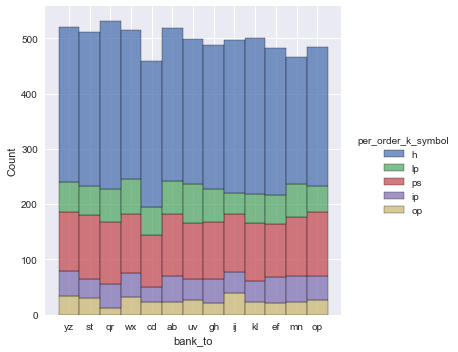

In [148]:
sns.displot(per_order, x="bank_to", hue="per_order_k_symbol", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("per_order1.png")

In [149]:
acc_per=pd.merge(account,per_order,left_on='account_id',right_on='account_id')

In [150]:
acc_per.head()

,account_id,district_id,frequency,account_date,order_id,bank_to,account_to,per_order_amount,per_order_k_symbol
0,576,55,mi,930101,30253,op,71033382,3662.0,h
1,3818,74,mi,930101,35031,qr,35474443,3596.0,h
2,3818,74,mi,930101,35032,op,32659602,1474.0,ps
3,3818,74,mi,930101,35033,cd,34760767,4065.0,ip
4,704,55,mi,930101,30436,ij,15132719,2141.0,h


In [151]:
acc_per.describe()

,account_id,district_id,account_date,order_id,account_to,per_order_amount
count,6471.000000,6471.000000,6471.000000,6471.000000,6.471000e+03,6471.000000
mean,2962.302890,36.965539,951725.181888,33778.197497,4.939904e+07,3280.635698
std,2518.503228,25.311669,14811.932662,3737.681949,2.888356e+07,2714.475335
min,1.000000,1.000000,930101.000000,29401.000000,3.990000e+02,1.000000
25%,1223.000000,13.000000,931229.000000,31187.500000,2.415918e+07,1241.500000
50%,2433.000000,38.000000,960108.000000,32988.000000,4.975606e+07,2596.000000
75%,3645.500000,60.000000,961101.000000,34785.500000,7.400045e+07,4613.500000
max,11362.000000,77.000000,971229.000000,46338.000000,9.999420e+07,14882.000000


In [152]:
acc_per.nunique()

account_id            3758
district_id             77
frequency                3
account_date          1468
order_id              6471
bank_to                 13
account_to            6446
per_order_amount      4412
per_order_k_symbol       5
dtype: int64

In [153]:
acc_per.shape

(6471, 9)

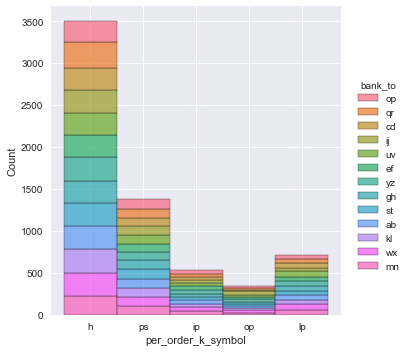

In [156]:
sns.displot(acc_per, x="per_order_k_symbol", hue="bank_to", multiple="stack")
fig.set_size_inches(20,20)
plt.savefig("acc_per1.png")

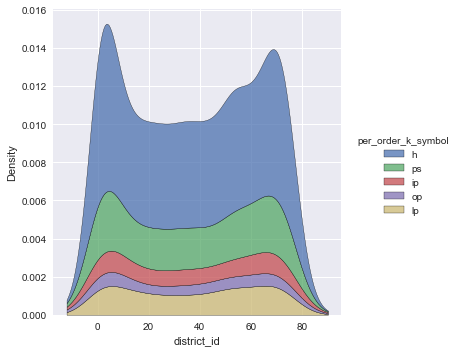

In [158]:
sns.displot(acc_per, x="district_id", hue="per_order_k_symbol", kind="kde",multiple="stack")
plt.savefig("acc_per2.png")

In [159]:
transaction.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
